In [1]:
import sys
from importlib import reload
import gc

In [2]:
import learning_loop
reload(learning_loop)
from learning_loop import learning_loop

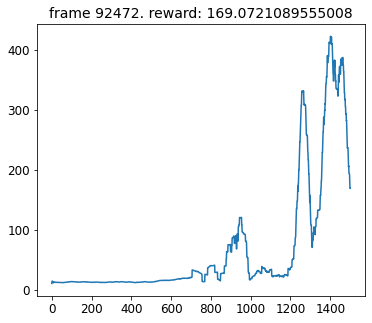

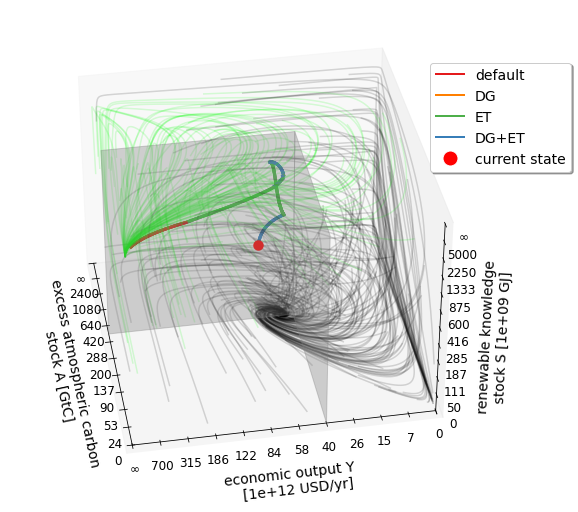

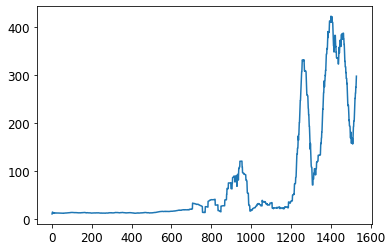

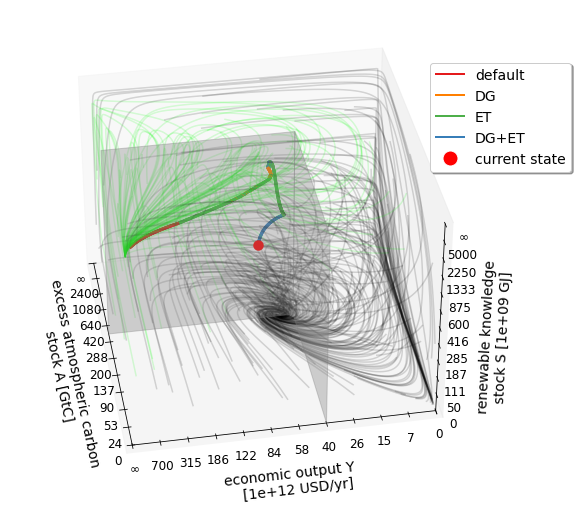

In [18]:
learning_loop(AGENT="DuellingDQN",
              SEED=0,
              UPDATE_ONLINE=False,
              EPSILON=0.1,
              LEARNING_RATE=3e-4,
              MAX_EPISODES=2000,
              MAX_FRAMES=1e5,
             PER_IS=True)

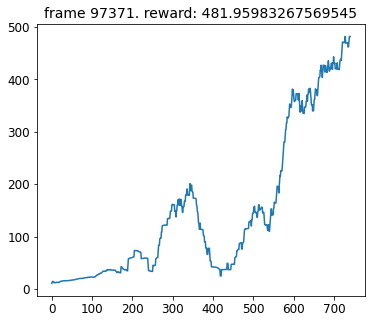

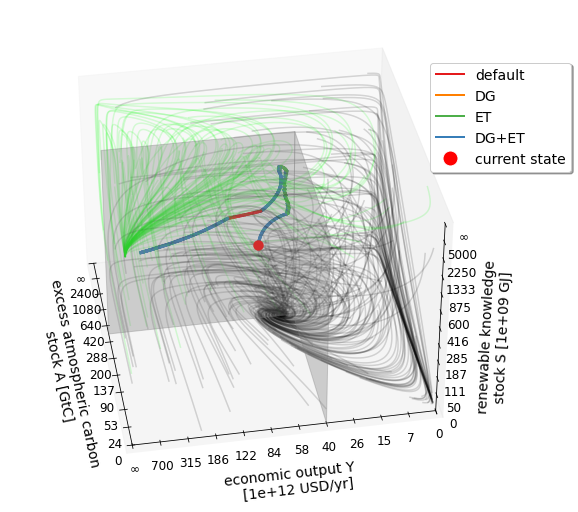

In [4]:
ag = learning_loop(AGENT="DuelDDQN",
              SEED=0,
              UPDATE_ONLINE=False,
              EPSILON=0.1,
              LEARNING_RATE=3e-4,
              MAX_EPISODES=2000,
              MAX_FRAMES=1e5,
             PER_IS=True)

In [5]:
import torch.nn as nn
import torch
from torch.nn.utils.weight_norm import weight_norm
from sklearn import preprocessing
import shap
import numpy as np
import joblib

In [6]:
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
DEVICE

device(type='cuda')

In [7]:
all_states = []
n = 100
for a in range(n):
    for y in range(n):
        for s in range(n):
            all_states.append([a/n, y/n, s/n])
data = np.array(all_states)
data.shape

(1000000, 3)

In [9]:
%%time
explainer = shap.DeepExplainer(ag.target_net,
                       torch.from_numpy(data).float().to(DEVICE))

Wall time: 21.8 ms


In [11]:
shap_values = explainer.shap_values(torch.from_numpy(data).float().to(DEVICE))

C:\Users\theod\anaconda3\envs\ML\lib\site-packages\torch\nn\modules\module.py:1025: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


RuntimeError: CUDA out of memory. Tried to allocate 1.91 GiB (GPU 0; 8.00 GiB total capacity; 3.88 GiB already allocated; 583.92 MiB free; 4.79 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [ ]:
import pandas as pd
df = pd.DataFrame({
    "mean_abs_shap": np.mean(np.abs(shap_values), axis=0), 
    "stdev_abs_shap": np.std(np.abs(shap_values), axis=0), 
    "name": ['A', 'Y','S']
})
df.sort_values("mean_abs_shap", ascending=False)[:10]

In [ ]:
shap.summary_plot(shap_values, features=x_samples, feature_names=features)